In [64]:
import spacy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Xbox & Playstation.csv to Xbox & Playstation.csv


In [3]:
df = pd.read_csv('Xbox & Playstation.csv')
df.head()

,ID,Name,Sentiment,Tweet
0,12801,Xbox(Xseries),Irrelevant,Pretty sure that Tetris Effect is already the ...
1,12801,Xbox(Xseries),Irrelevant,Pretty sure that Tetris Effect is already the ...
2,12801,Xbox(Xseries),Irrelevant,Pretty is confident that the Tetris Effect is ...
3,12801,Xbox(Xseries),Irrelevant,Pretty sure that Tetris Effect may already the...
4,12801,Xbox(Xseries),Irrelevant,1 Pretty sure that Tetris Effect is already co...


In [4]:
df.shape

(4644, 4)

In [5]:
df.columns

Index(['ID', 'Name', 'Sentiment', 'Tweet'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4644 entries, 0 to 4643
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         4644 non-null   int64 
 1   Name       4644 non-null   object
 2   Sentiment  4644 non-null   object
 3   Tweet      4574 non-null   object
dtypes: int64(1), object(3)
memory usage: 145.3+ KB


In [8]:
df.isna().sum()

,0
ID,0
Name,0
Sentiment,0
Tweet,70


In [9]:
df.duplicated().sum()

np.int64(226)

In [12]:
df

,ID,Name,Sentiment,Tweet
0,12801,Xbox(Xseries),Irrelevant,Pretty sure that Tetris Effect is already the ...
1,12801,Xbox(Xseries),Irrelevant,Pretty sure that Tetris Effect is already the ...
2,12801,Xbox(Xseries),Irrelevant,Pretty is confident that the Tetris Effect is ...
3,12801,Xbox(Xseries),Irrelevant,Pretty sure that Tetris Effect may already the...
4,12801,Xbox(Xseries),Irrelevant,1 Pretty sure that Tetris Effect is already co...
...,...,...,...,...
4639,10000,PlayStation5(PS5),Irrelevant,"Out of love for Uncle Ben, please tell me I do..."
4640,10000,PlayStation5(PS5),Irrelevant,"For Uncle Ben's sake, please tell me I won't h..."
4641,10000,PlayStation5(PS5),Irrelevant,"For real love of Uncle Ben, please tell me I d..."
4642,10000,PlayStation5(PS5),Irrelevant,"For everyone the love of Uncle Ben, please tel..."


In [26]:
df['Sentiment'].value_counts()

,count
Sentiment,
Positive,1734
Irrelevant,1146
Neutral,930
Negative,834


<ipython-input-29-9dcd0823f740>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = 'Sentiment', palette = 'Set2')


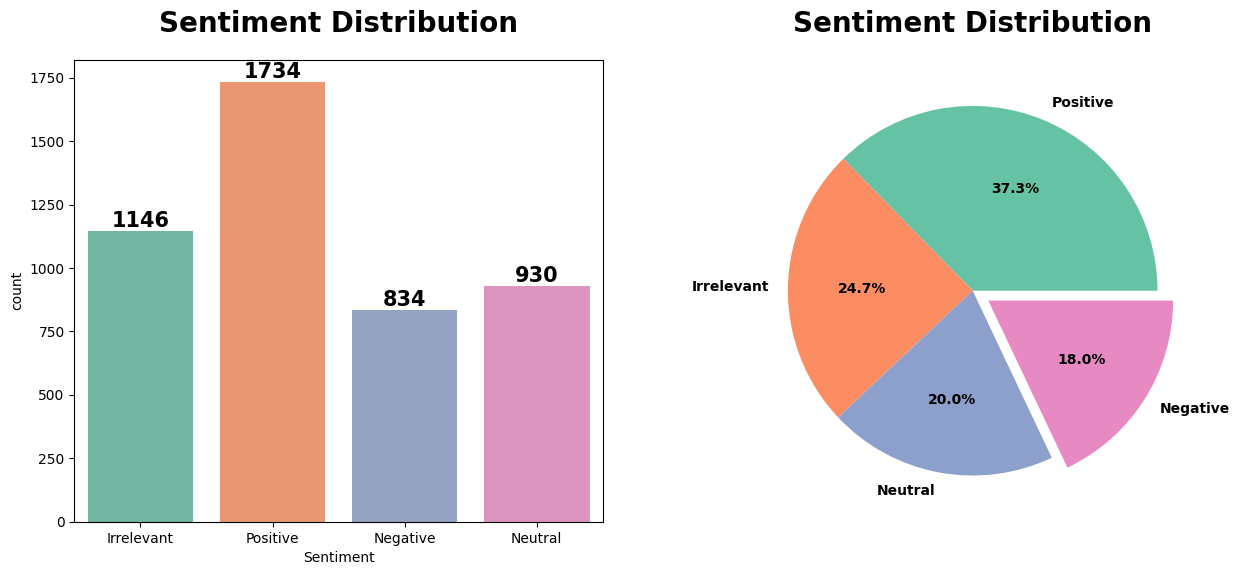

In [29]:
plt.figure(figsize = (15, 6))
plt.subplot(1,2,1)
ax = sns.countplot(data = df, x = 'Sentiment', palette = 'Set2')
for container in ax.containers:
    ax.bar_label(container, fontweight = 'black', size = 15)
plt.title("Sentiment Distribution", fontweight = 'black', size = 20, pad = 20)


plt.subplot(1,2,2)
plt.pie(df['Sentiment'].value_counts(), autopct = '%1.1f%%', labels = df['Sentiment'].value_counts().index, explode = [0,0,0,0.1],colors=sns.set_palette("Set2"), textprops={"fontweight":"black"})
plt.title("Sentiment Distribution", fontweight = 'black', size = 20, pad = 20)

plt.show()

In [30]:
df['Name'].value_counts()

,count
Name,
Xbox(Xseries),2334
PlayStation5(PS5),2310


<ipython-input-31-efbb74a777c6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['Name'].value_counts().values, y = df['Name'].value_counts().index, palette = 'viridis')


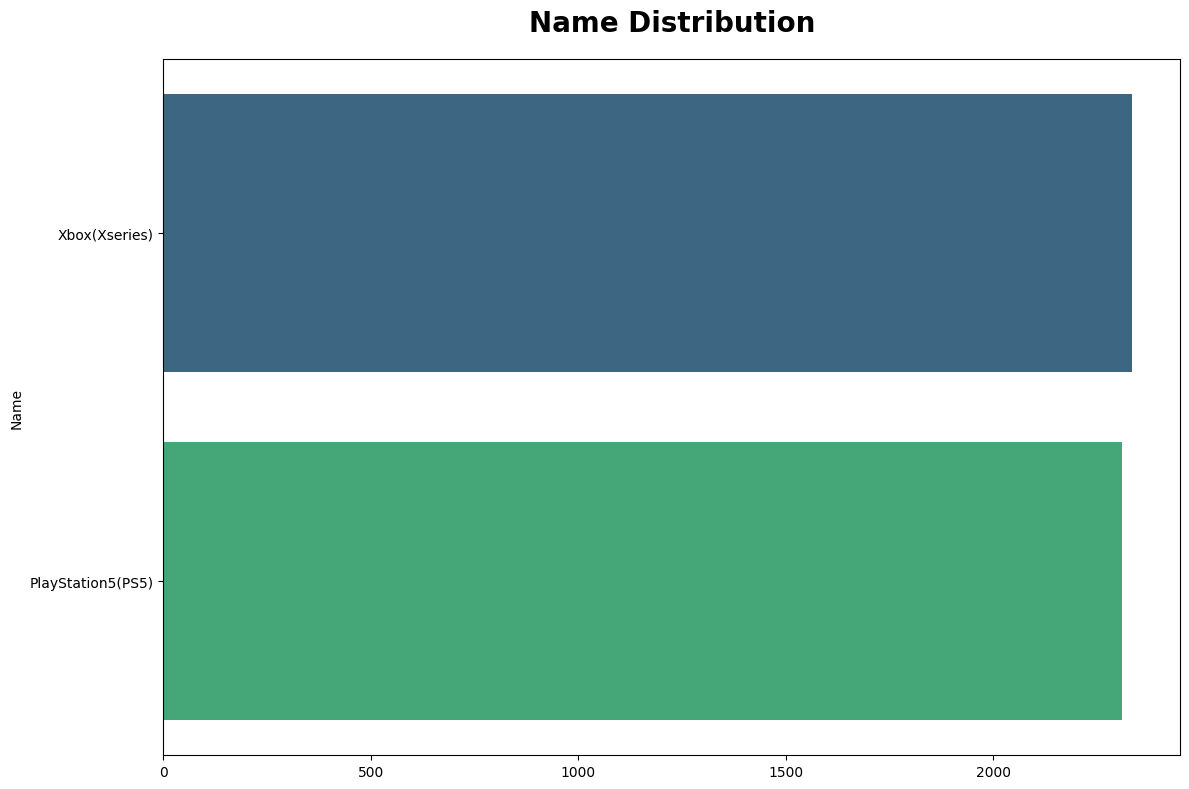

In [31]:
plt.figure(figsize = (12, 8))
sns.barplot(x = df['Name'].value_counts().values, y = df['Name'].value_counts().index, palette = 'viridis')
plt.title("Name Distribution", fontweight = 'black', size = 20, pad = 20)

plt.tight_layout()
plt.show()

In [32]:
df.dropna(inplace = True)

In [33]:
df.isna().sum()

,0
ID,0
Name,0
Sentiment,0
Tweet,0


In [34]:
nlp = spacy.load('en_core_web_sm')

In [35]:
def preprocessing(text):
    doc = nlp(text)
    cleaned_tokens = []

    for token in doc:
        if token.is_stop or token.is_punct:
            continue

        else:
            cleaned_tokens.append(token.lemma_)

    return " ".join(cleaned_tokens)

In [36]:
df['cleaned_text'] = df['Tweet'].apply(preprocessing)

In [37]:
df.head()

,ID,Name,Sentiment,Tweet,cleaned_text
0,12801,Xbox(Xseries),Irrelevant,Pretty sure that Tetris Effect is already the ...,pretty sure Tetris Effect good launch title Xb...
1,12801,Xbox(Xseries),Irrelevant,Pretty sure that Tetris Effect is already the ...,pretty sure Tetris Effect good launch title Xb...
2,12801,Xbox(Xseries),Irrelevant,Pretty is confident that the Tetris Effect is ...,Pretty confident Tetris Effect good starting t...
3,12801,Xbox(Xseries),Irrelevant,Pretty sure that Tetris Effect may already the...,pretty sure Tetris Effect good launch title Xb...
4,12801,Xbox(Xseries),Irrelevant,1 Pretty sure that Tetris Effect is already co...,1 pretty sure Tetris Effect consider good laun...


In [38]:
df['Combined_Text'] = df['cleaned_text'] + ' ' + df['Name']

In [39]:
encoder = LabelEncoder()

df['label'] = encoder.fit_transform(df['Sentiment'])

In [40]:
df.head()

,ID,Name,Sentiment,Tweet,cleaned_text,Combined_Text,label
0,12801,Xbox(Xseries),Irrelevant,Pretty sure that Tetris Effect is already the ...,pretty sure Tetris Effect good launch title Xb...,pretty sure Tetris Effect good launch title Xb...,0
1,12801,Xbox(Xseries),Irrelevant,Pretty sure that Tetris Effect is already the ...,pretty sure Tetris Effect good launch title Xb...,pretty sure Tetris Effect good launch title Xb...,0
2,12801,Xbox(Xseries),Irrelevant,Pretty is confident that the Tetris Effect is ...,Pretty confident Tetris Effect good starting t...,Pretty confident Tetris Effect good starting t...,0
3,12801,Xbox(Xseries),Irrelevant,Pretty sure that Tetris Effect may already the...,pretty sure Tetris Effect good launch title Xb...,pretty sure Tetris Effect good launch title Xb...,0
4,12801,Xbox(Xseries),Irrelevant,1 Pretty sure that Tetris Effect is already co...,1 pretty sure Tetris Effect consider good laun...,1 pretty sure Tetris Effect consider good laun...,0


In [41]:
X = df['Combined_Text']
y = df['label']

In [42]:
tfidf = TfidfVectorizer()

X_vectorized = tfidf.fit_transform(X)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size = 0.2, random_state = 42)

In [44]:
X_train.shape

(3659, 3582)

In [45]:
y_train.shape

(3659,)

In [46]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

In [47]:
lr.score(X_train, y_train)

0.948346542771249

In [48]:
y_pred = lr.predict(X_test)

In [49]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8655737704918033

<Axes: >

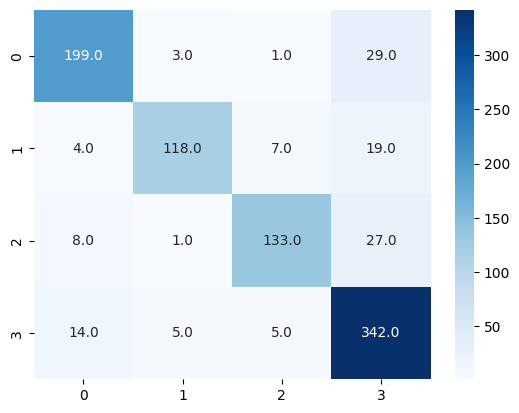

In [50]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True,fmt ='0.1f', cmap = 'Blues')

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       232
           1       0.93      0.80      0.86       148
           2       0.91      0.79      0.84       169
           3       0.82      0.93      0.87       366

    accuracy                           0.87       915
   macro avg       0.89      0.84      0.86       915
weighted avg       0.87      0.87      0.87       915



In [52]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
rf.score(X_train, y_train)

0.98551516807871

In [54]:
y_pred = rf.predict(X_test)

In [55]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9224043715846995

<Axes: >

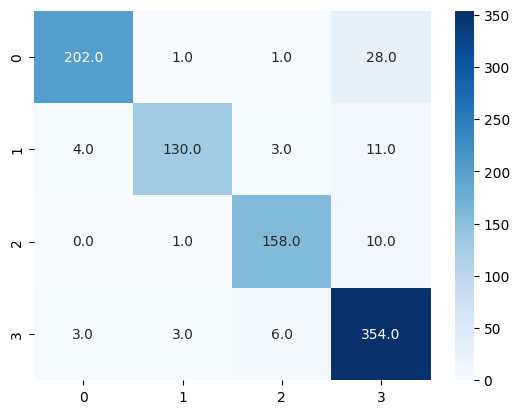

In [56]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True,fmt ='0.1f', cmap = 'Blues')

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       232
           1       0.96      0.88      0.92       148
           2       0.94      0.93      0.94       169
           3       0.88      0.97      0.92       366

    accuracy                           0.92       915
   macro avg       0.94      0.91      0.92       915
weighted avg       0.93      0.92      0.92       915



svm

In [60]:
le_model = LabelEncoder()
df['Sentiment'] = le_model.fit_transform(df['Sentiment'])

In [62]:
X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['Sentiment'],
                                                    test_size=0.2, random_state=42, stratify=df['Sentiment'])

In [65]:
from sklearn.svm import SVC
clf = Pipeline([
    ('vectorizer_tri_grams', TfidfVectorizer()),
    ('svm', SVC(kernel='linear'))
])

In [66]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_tri_grams', TfidfVectorizer()),
                ('svm', SVC(kernel='linear'))])

In [67]:
y_pred = clf.predict(X_test)

In [68]:
print(accuracy_score(y_test, y_pred))

0.926775956284153


In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       222
           1       0.95      0.92      0.93       165
           2       0.94      0.90      0.92       184
           3       0.90      0.96      0.93       344

    accuracy                           0.93       915
   macro avg       0.93      0.92      0.93       915
weighted avg       0.93      0.93      0.93       915



## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
import string

import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Embedding, Dropout, Dense, GlobalAveragePooling1D, Bidirectional, BatchNormalization
from tensorflow.keras.regularizers import l2
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score ,classification_report ,roc_curve, auc ,precision_recall_curve
from sklearn.model_selection import train_test_split

import pickle
import joblib

* Read data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving twitter_training.csv to twitter_training.csv
Saving Xbox & Playstation.csv to Xbox & Playstation.csv


In [3]:
train_data =pd.read_csv('Xbox & Playstation.csv', names=['number' , 'Border' , 'label' , 'text'] )
test_data =pd.read_csv('twitter_training.csv', names=['number' , 'Border' , 'label' , 'text'])
train_data.shape, test_data.shape

((4645, 4), (74682, 4))

In [4]:
train_data.head()

,number,Border,label,text
0,ID,Name,Sentiment,Tweet
1,12801,Xbox(Xseries),Irrelevant,Pretty sure that Tetris Effect is already the ...
2,12801,Xbox(Xseries),Irrelevant,Pretty sure that Tetris Effect is already the ...
3,12801,Xbox(Xseries),Irrelevant,Pretty is confident that the Tetris Effect is ...
4,12801,Xbox(Xseries),Irrelevant,Pretty sure that Tetris Effect may already the...


* **I will Drop `'number', 'Border'` Columns**

In [5]:
train_data.drop(['number', 'Border'], axis= 1, inplace= True)
test_data.drop(['number', 'Border'], axis= 1, inplace= True)
train_data.head()

,label,text
0,Sentiment,Tweet
1,Irrelevant,Pretty sure that Tetris Effect is already the ...
2,Irrelevant,Pretty sure that Tetris Effect is already the ...
3,Irrelevant,Pretty is confident that the Tetris Effect is ...
4,Irrelevant,Pretty sure that Tetris Effect may already the...


In [6]:
train_data.isna().sum()

,0
label,0
text,70


* Remove Nulls

In [7]:
train_data.dropna(axis=0, inplace= True)

In [8]:
train_data.duplicated().sum()

np.int64(238)

- Remove Duplication

In [9]:
train_data.drop_duplicates(inplace= True)

In [10]:
train_data.shape

(4337, 2)

In [11]:
train_data['label'].value_counts()

,count
label,
Positive,1627
Irrelevant,1048
Neutral,885
Negative,776
Sentiment,1


<Axes: ylabel='count'>

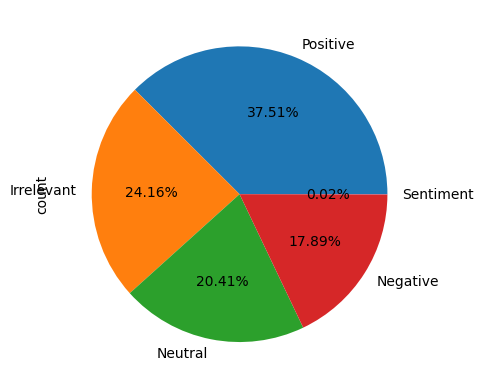

In [12]:
train_data['label'].value_counts().plot.pie(autopct='%2.2f%%')

- I Will use only positive and negative text

In [13]:
train_data = train_data[train_data['label'].isin(['Positive', 'Negative'])]

In [14]:
train_data['label'].value_counts()

,count
label,
Positive,1627
Negative,776


<Axes: ylabel='count'>

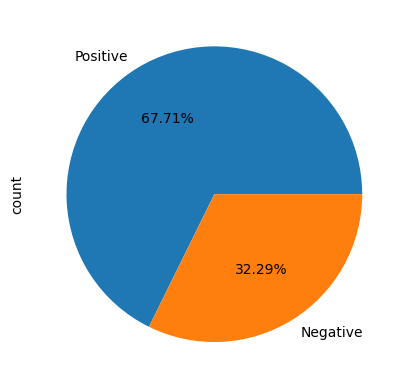

In [15]:
train_data['label'].value_counts().plot.pie(autopct='%2.2f%%')

## Preprocessing

In [22]:
embedding_dim =128
oov_tok ='<OOV>'
training_portion = .8
max_length =150

- **Data Cleaning**

In [25]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [26]:
punc =string.punctuation
st_words =stopwords.words('english')
print(st_words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [27]:
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer




def clean_text (text):

    text = re.sub('@ ?[\w]+', '', text)
    text = re.sub('https?://\S+|www\.\S+' ,' ',text)
    text = re.sub('\w*gmail.com\b|\w*yahoo.co.in\b' ,' ',text)
    text = re.sub('<.*>', '', text)
    text = re.sub('[\W]',' ', text)
    text = re.sub('[0-9]',' ', text)
    #remove single character
    text = re.sub('\s+[a-zA-Z]\s+',' ', text)
    #removeing multiple spaces
    text = re.sub('\s+',' ', text)

    #tokens = word_tokenize(text)

    text=''.join([word.lower() for word in text if word not in punc])
    text =' '.join([word for word in text.split() if word not in st_words])


    return text



train_data['cleaned_text'] = train_data['text'].apply(lambda x: clean_text(x))

train_data.head(15)

,label,text,cleaned_text
13,Positive,So glad I'll be experiencing,glad experiencing
14,Positive,So glad that I will experience,glad experience
15,Positive,So glad I got to experience it,glad got experience
16,Positive,So glad you be experiencing,glad experiencing
17,Positive,So completely glad I'll be experiencing,completely glad experiencing
18,Positive,So glad I'll be a,glad
25,Positive,got a new xbox series x from best buy. heck yeah,got new xbox series best buy heck yeah
26,Positive,got a new Xbox series x from Best Buy.,got new xbox series best buy
27,Positive,got a new xbox series from best buy. heck-ah,got new xbox series best buy heck ah
28,Positive,got a black xbox series x from best buy. heck ...,got black xbox series best buy heck yeah


In [29]:
from collections import Counter
word_count = Counter()

for text in train_data['cleaned_text']:
    for word in text.split():
        word_count[word] += 1

word_count.most_common(10)

[('ps', 762),
 ('xbox', 555),
 ('series', 393),
 ('like', 205),
 ('get', 201),
 ('really', 170),
 ('looks', 166),
 ('one', 151),
 ('wait', 145),
 ('fuck', 145)]

In [30]:
freq =set(word for (word ,wc) in word_count.most_common(5))
rare = set (word for (word ,wc) in word_count.most_common()[:-10:-1])
rare

{'appropriately',
 'headlines',
 'international',
 'kyo',
 'maintain',
 'ridiculous',
 'sega',
 'visually',
 'worlds'}

In [31]:
train_data['label'].replace({'Positive':1, 'Negative':0}, inplace= True)

<ipython-input-31-c48686831f79>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['label'].replace({'Positive':1, 'Negative':0}, inplace= True)
<ipython-input-31-c48686831f79>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['label'].replace({'Positive':1, 'Negative':0}, inplace

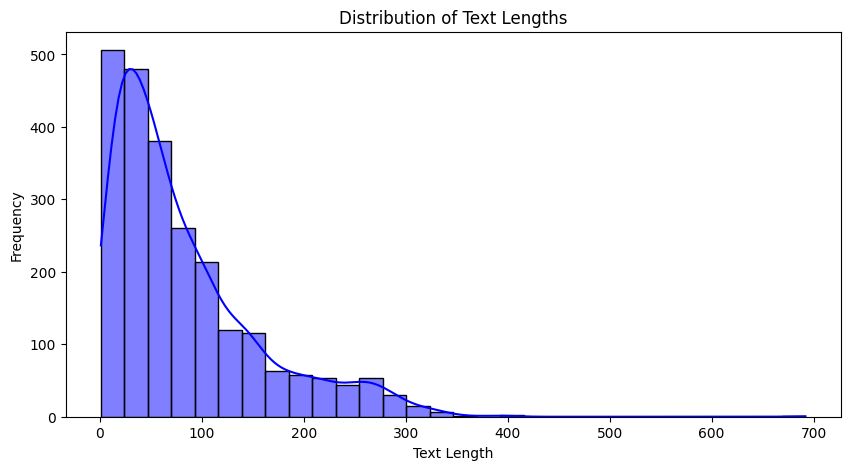

In [32]:
text_lengths = [len(text) for text in train_data['text']]

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(text_lengths, bins=30, kde=True, color='blue')

# Labels and title
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.title("Distribution of Text Lengths")
plt.show()


In [33]:
X = train_data['cleaned_text']
y = train_data['label']

In [34]:
tokenizer =Tokenizer( oov_token= oov_tok )
tokenizer.fit_on_texts(X)
word_indx =tokenizer.word_index

sequence = tokenizer.texts_to_sequences(X)
sequence_padded =pad_sequences(sequence, padding= 'post', maxlen= max_length)

In [35]:
vocab_size =len(word_indx)
vocab_size

2302

In [36]:
# print(word_indx)

In [ ]:
print((X[10]))
print((sequence[10]))
print((sequence_padded[10]))

extremely disappointed amazon today ordered kindle lightning deal order canceled leading payment issue try order back says deal already claimed disappointing thanks
[19, 110, 12, 33, 321, 2627, 2628, 346, 1370, 105, 971, 304, 689, 330, 230, 1087, 151, 152, 236, 135, 2629, 2365]
[  19  110   12   33  321 2627 2628  346 1370  105  971  304  689  330
  230 1087  151  152  236  135 2629 2365    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0 

- save tokenizer

In [38]:
joblib.dump(tokenizer, "tokenizer.pkl")

['tokenizer.pkl']

- Spilit text into train and validation

In [39]:
X_train, X_val, y_train, y_val = train_test_split(sequence_padded, y, test_size=0.2, random_state=42)

print('train_sentence length :',len(X_train))
print('train_labels length :',len(y_train))
print('test_sentence length :',len(X_val))
print('test_labels length :',len(y_val))

train_sentence length : 1922
train_labels length : 1922
test_sentence length : 481
test_labels length : 481


## Modle

In [40]:
model =Sequential([
    Embedding(vocab_size +1, embedding_dim, input_length= max_length),

    Bidirectional(LSTM(64, return_sequences=True, dropout = 0.2 , recurrent_dropout = 0.2)),

    Bidirectional(LSTM(32, dropout = 0.2 , recurrent_dropout = 0.2)),


    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.build(input_shape=(None, max_length))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 150, 128)       │       294,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 150, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 436,929 (1.67 MB)

 Trainable params: 436,929 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
history =model.fit(X_train, y_train, batch_size=64, epochs= 10, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.6682 - loss: 0.6546 - val_accuracy: 0.7069 - val_loss: 0.6028
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 65s 914ms/step - accuracy: 0.6820 - loss: 0.6102 - val_accuracy: 0.7900 - val_loss: 0.4211
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 40s 903ms/step - accuracy: 0.8825 - loss: 0.3116 - val_accuracy: 0.8919 - val_loss: 0.2540
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 42s 926ms/step - accuracy: 0.9465 - loss: 0.1326 - val_accuracy: 0.9397 - val_loss: 0.1592
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 42s 932ms/step - accuracy: 0.9783 - loss: 0.0615 - val_accuracy: 0.9522 - val_loss: 0.1504
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 40s 942ms/step - accuracy: 0.9857 - loss: 0.0402 - val_accuracy: 0.9397 - val_loss: 0.1531
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 41s 937ms/step - accuracy: 0.9877 - loss: 0.0326 - val_accuracy: 0.9376 - val_loss: 0.1707
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 41s 924ms/step - accuracy: 0.9854 - loss: 0.0398 - val_accurac

In [42]:
model.save('sentiment_analysis_model.keras')

In [43]:
accur, loss =model.evaluate(X_val, y_val)

print('test accuracy is :',accur)
print('test loss is :',loss)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - accuracy: 0.9554 - loss: 0.1491
test accuracy is : 0.1504322588443756
test loss is : 0.952182948589325


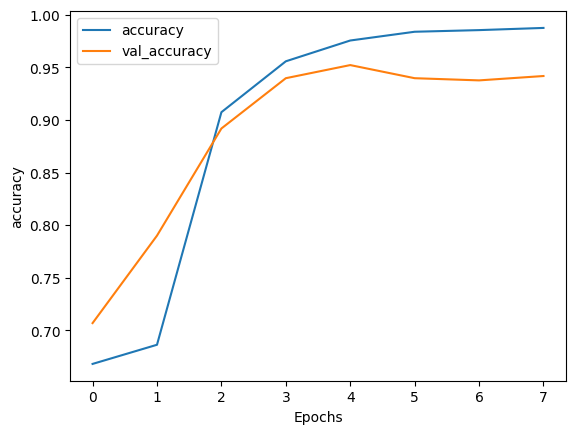

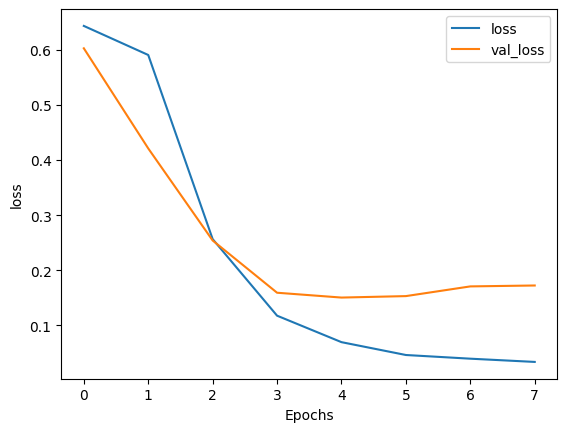

In [44]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+ string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string,'val_'+ string ])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

- **Confusion Matrix**

16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 257ms/step


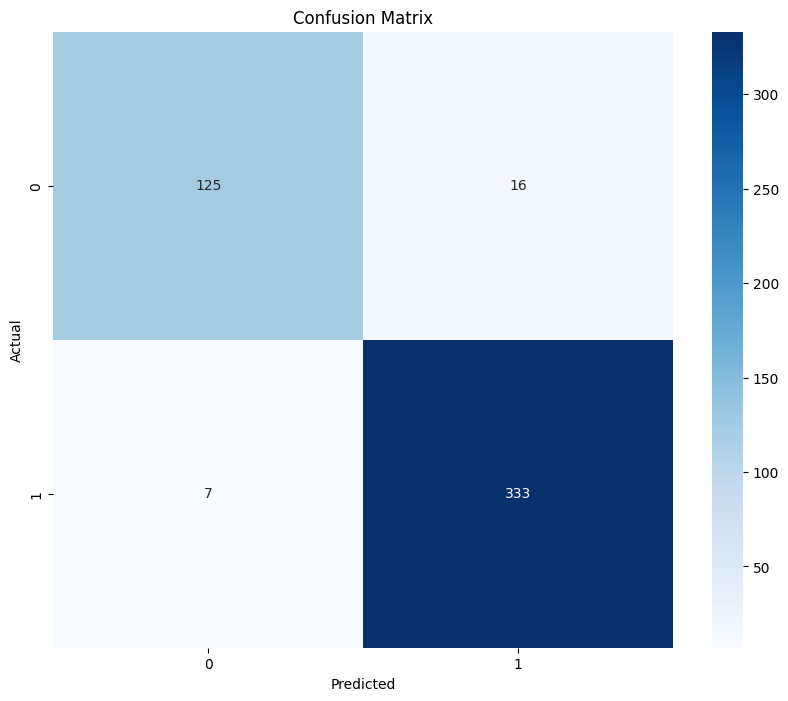

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_pred = model.predict(X_val)
y_pred_classes = (y_pred > 0.5).astype(int)


conf_matrix = confusion_matrix(y_val, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- **Classification Report**

In [46]:
y_pred.max()

np.float32(0.99836105)

In [47]:
y_pred_classes = np.array(y_pred_classes)

# Convert class labels to strings
target_names = [str(label) for label in np.unique(y)]

# Generate classification report
class_report = classification_report(y_val, y_pred_classes, target_names=target_names)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       141
           1       0.95      0.98      0.97       340

    accuracy                           0.95       481
   macro avg       0.95      0.93      0.94       481
weighted avg       0.95      0.95      0.95       481



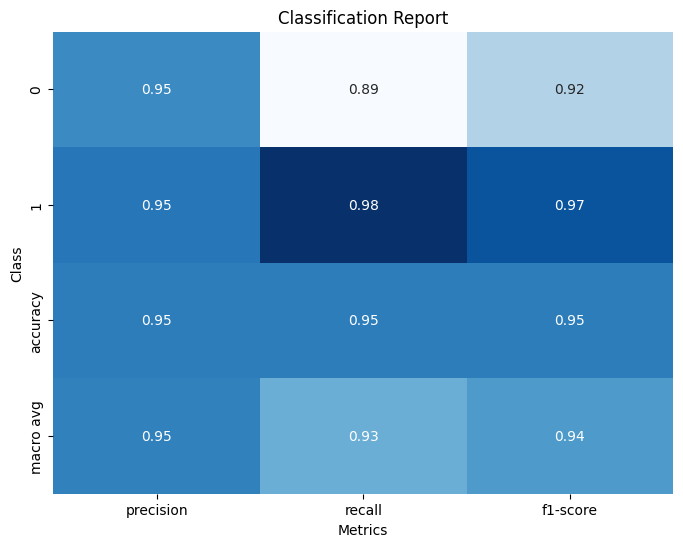

In [48]:
report = classification_report(y_val, y_pred_classes, target_names=np.unique(y), output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f', cbar=False)
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.title('Classification Report' )
plt.show()